In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE
from sklearn.decomposition import PCA


In [5]:
df= pd.read_csv("LifeExp.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [6]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

## Removing Missing Values

In [8]:
for column in df.columns:
    if df[column].isnull().any():  
        mean_value = df[column].mean()  
        df[column] = df[column].fillna(mean_value) 
df.columns = df.columns.str.strip()

df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

# Initial Summary

In [8]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Separating Numerical and Categorical Columns


In [10]:
numerical_columns = df.select_dtypes(include=[int, float]).columns
categorical_columns = df.select_dtypes(include=[object]).columns

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Categorical columns: Index(['Country', 'Status'], dtype='object')


# Box Plot to see Outliers

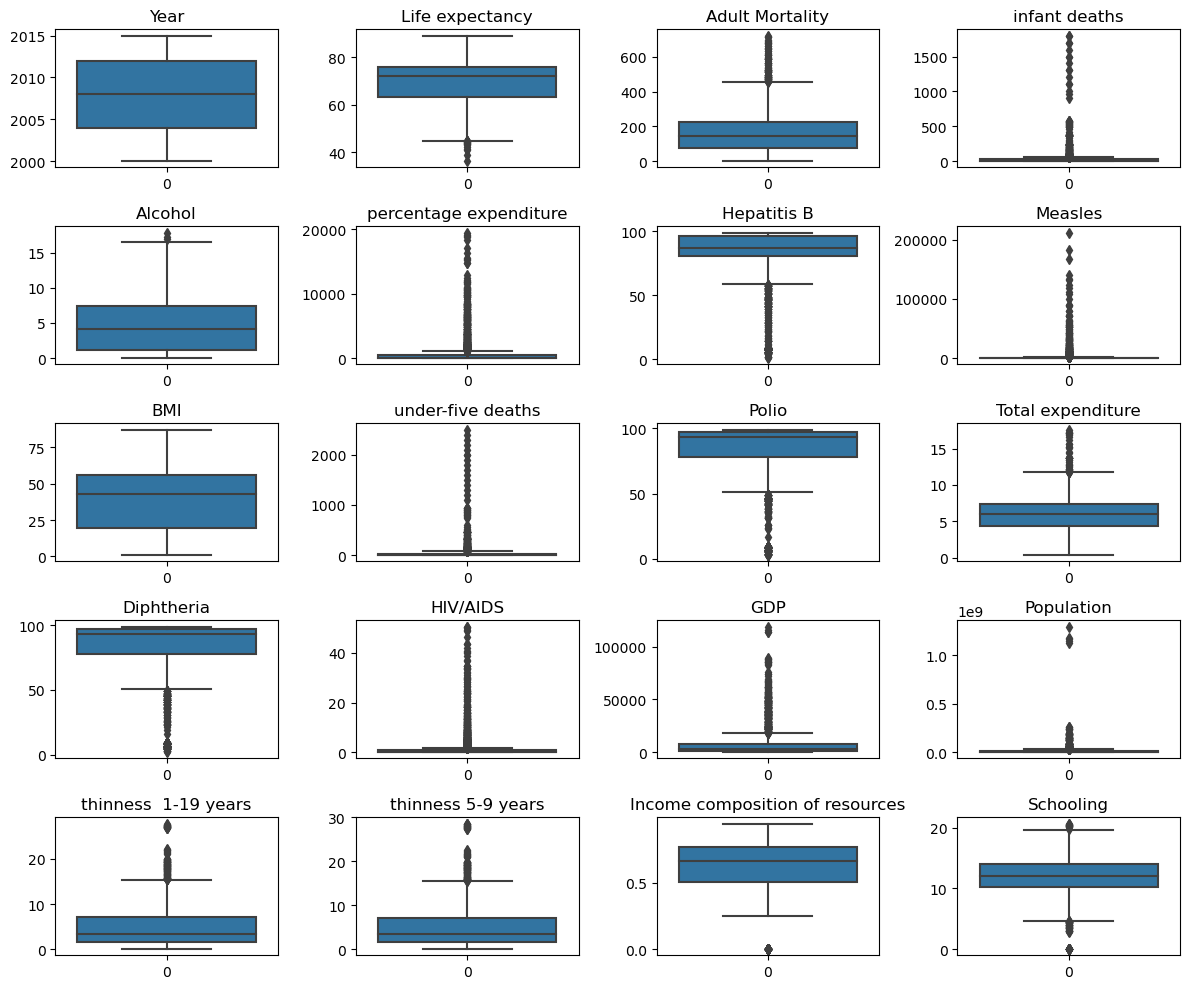

In [11]:
plt.figure(figsize=(12, 10))
num_plots = len(numerical_columns)
num_rows = (num_plots - 1) // 4 + 1  # Calculate the number of rows needed
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)  # Adjust the number of columns to 4
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


## Removing Outliers


In [12]:
def remove_outliers(df):
    for column in df.select_dtypes(include=['int', 'float']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from all numerical columns
df_cleaned = remove_outliers(df)



# With and Without Cross Validation

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

# Assuming 'life_expectancy' is your target column
X = df.drop(columns=['Life expectancy'])

# Exclude non-numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_columns]

y = df['Life expectancy']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Without cross-validation
print("Without Cross-Validation:")
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initializing the KNN regressor
k = 5  # You can change the value of k
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Fitting the model
knn_regressor.fit(X_train, y_train)

# Making predictions
y_pred = knn_regressor.predict(X_test)

# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

# Calculating AIC using statsmodels
X_train_with_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_with_const)
results = model.fit()
aic_val = results.aic
bic_val = results.bic
p_values = results.pvalues

# Printing evaluation metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r_squared)
print("AIC:", aic_val)
print("BIC:", bic_val)
print("P-Values:")
print(p_values)
print()

# With cross-validation
print("With Cross-Validation:")
# Initializing the KNN regressor
knn_regressor_cv = KNeighborsRegressor(n_neighbors=k)

# Initializing KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculating evaluation metrics using cross-validation
mae_scores = cross_val_score(knn_regressor_cv, X_scaled, y, cv=kf, scoring='neg_mean_absolute_error')
mse_scores = cross_val_score(knn_regressor_cv, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
r2_scores = cross_val_score(knn_regressor_cv, X_scaled, y, cv=kf, scoring='r2')

# Printing evaluation metrics
print("MAE:", abs(mae_scores.mean()))
print("MSE:", abs(mse_scores.mean()))
print("RMSE:", rmse_scores.mean())
print("R-Squared:", r2_scores.mean())


Without Cross-Validation:
MAE: 1.8022790974313216
MSE: 6.612752448808324
RMSE: 2.5715272599776817
R-Squared: 0.9236713647735508
AIC: 13339.966003445563
BIC: 13455.209415588328
P-Values:
const     0.000000e+00
x1        7.539913e-01
x2       6.937763e-111
x3        3.949579e-23
x4        2.251703e-05
x5        2.283198e-01
x6        1.373558e-04
x7        5.306999e-03
x8        2.621261e-12
x9        8.879606e-24
x10       4.450774e-08
x11       1.108056e-01
x12       3.205209e-14
x13      1.909500e-113
x14       9.417251e-03
x15       6.207610e-01
x16       8.018830e-02
x17       9.020207e-01
x18       1.419269e-18
x19       6.878917e-40
dtype: float64

With Cross-Validation:
MAE: 1.9805902054140467
MSE: 8.363294207260472
RMSE: 2.884819511030351
R-Squared: 0.9069087431491699


# Without Cross-Validation:

### MAE (Mean Absolute Error): 
The average absolute difference between the actual and predicted life expectancy values is approximately 1.80 years. It represents the model's average error.

### MSE (Mean Squared Error): 
The average squared difference between the actual and predicted values is approximately 6.61 square years. It penalizes larger errors more heavily than MAE.

### RMSE (Root Mean Squared Error): 
The square root of MSE is approximately 2.57 years. It provides an interpretable value in the same units as the target variable (life expectancy).

### R-Squared (Coefficient of Determination): 
Around 92.37% of the variance in life expectancy is explained by the independent variables included in the model. A higher R-squared value indicates a better fit of the model to the data.
AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion): These information criteria are used for model selection. Lower values (13339.97 for AIC and 13455.21 for BIC) indicate a better fit, considering the trade-off between goodness of fit and model complexity.
### P-Values: 
These p-values assess the statistical significance of each coefficient in the linear regression model. For instance, a p-value of less than 0.05 (e.g., for 'Year', 'Status', etc.) suggests that the corresponding feature significantly contributes to predicting life expectancy.

# With Cross-Validation:

### MAE: 
The average MAE computed using 5-fold cross-validation is approximately 1.98 years, slightly higher than the MAE without cross-validation. It suggests that the model's predictive performance might slightly degrade when evaluated on unseen data.

### MSE: 
The average MSE using cross-validation is around 8.36 square years, again slightly higher than the MSE without cross-validation.

### RMSE: 
The average RMSE using cross-validation is approximately 2.88 years, indicating a similar pattern to MAE and MSE.
### R-Squared: 
The average R-squared value obtained from cross-validation is about 90.69%, which is slightly lower than the R-squared value obtained without cross-validation.

## Interpretation:

* The model performs relatively well in predicting life expectancy, as indicated by the low MAE, MSE, and RMSE values and the high R-squared value.

* However, there seems to be a slight decrease in performance when evaluated using cross-validation, suggesting that the model might not generalize perfectly to unseen data.
* The AIC and BIC values indicate that the model is adequately fit to the data while considering its complexity.
* The statistically significant p-values for most coefficients suggest that the included features are important predictors of life expectancy.


# With RFE (Recursive Feature Elimination)

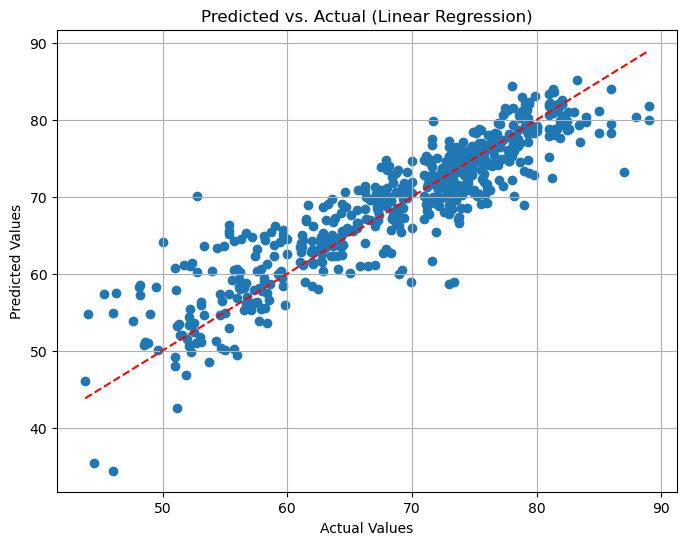

Linear Regression Results:
R-squared: 0.8226947795445846
Mean Squared Error: 15.360886871284777
Mean Absolute Error: 2.8612471374316026
Root Mean Squared Error (RMSE): 3.919296731721748




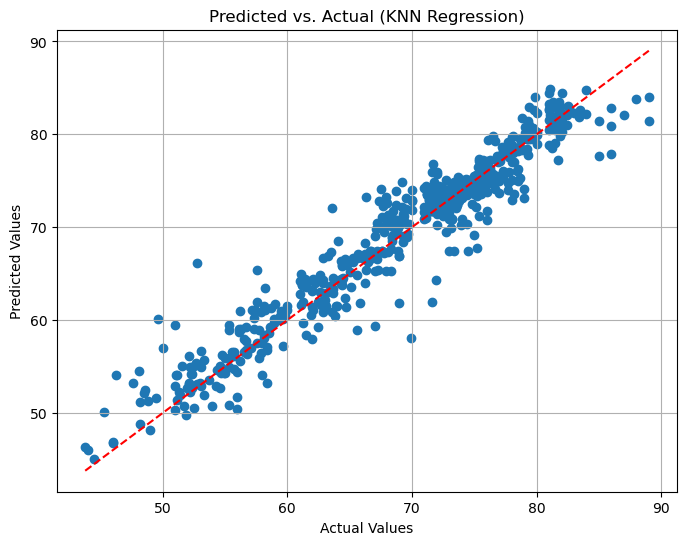

KNN Regression Results:
R-squared: 0.9236713647735508
Mean Squared Error: 6.612752448808324
Mean Absolute Error: 1.8022790974313216
Root Mean Squared Error (RMSE): 2.5715272599776817




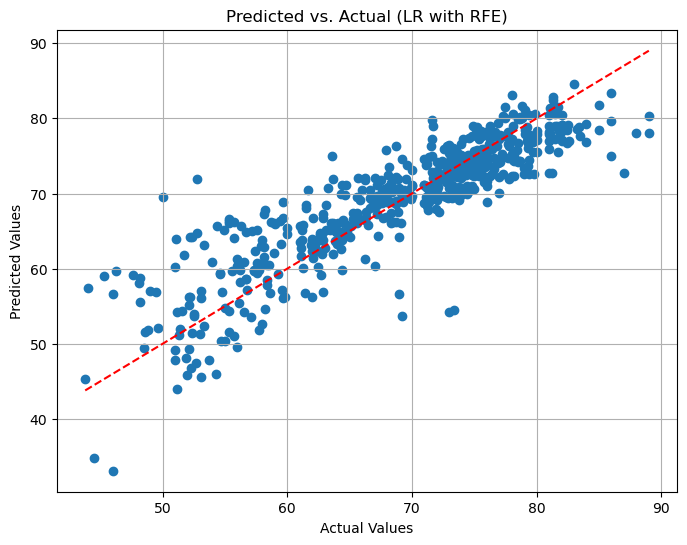

Linear Regression with RFE Results:
R-squared: 0.7661755777523046
Mean Squared Error: 20.25744356914489
Mean Absolute Error: 3.251137453505833
Root Mean Squared Error (RMSE): 4.500826987248553




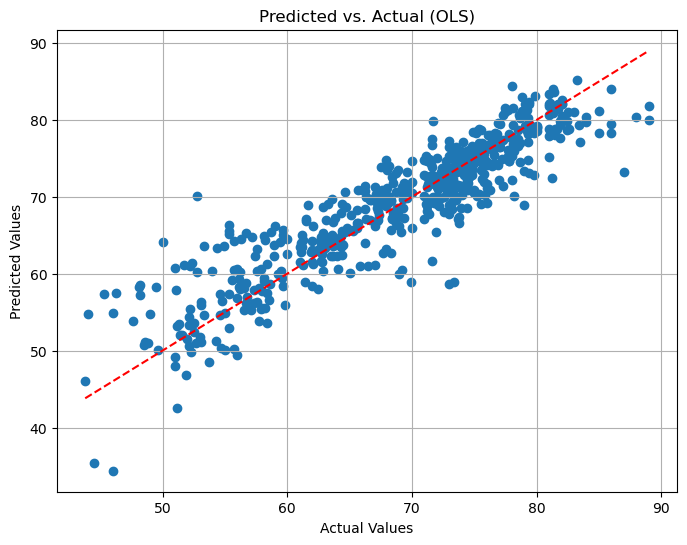


######################### OLS ###################
                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     543.5
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:49:56   Log-Likelihood:                -6650.0
No. Observations:                2350   AIC:                         1.334e+04
Df Residuals:                    2330   BIC:                         1.346e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Assuming 'life_expectancy' is your target column
X = df.drop(columns=['Life expectancy'])

# Exclude non-numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_columns]

y = df['Life expectancy']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Plotting Predicted vs. Actual for LR model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (Linear Regression)")
plt.grid(True)
plt.show()

# Print Linear Regression results
print("Linear Regression Results:")
print("R-squared:", r2_score(y_test, lr_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, lr_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, lr_predictions))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, lr_predictions)))
print("\n")

# KNN Regression model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Plotting Predicted vs. Actual for KNN model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (KNN Regression)")
plt.grid(True)
plt.show()

# Print KNN Regression results
print("KNN Regression Results:")
print("R-squared:", r2_score(y_test, knn_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, knn_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, knn_predictions))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, knn_predictions)))
print("\n")

# Linear Regression with RFE (Recursive Feature Elimination)
lr_model_rfe = LinearRegression()
rfe = RFE(estimator=lr_model_rfe, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)
selected_feature_indices = rfe.support_
X_train_rfe = X_train[:, selected_feature_indices]
X_test_rfe = X_test[:, selected_feature_indices]
lr_model_rfe.fit(X_train_rfe, y_train)
lr_predictions_rfe = lr_model_rfe.predict(X_test_rfe)

# Plotting Predicted vs. Actual for LR with RFE
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions_rfe)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (LR with RFE)")
plt.grid(True)
plt.show()

# Print LR with RFE results
print("Linear Regression with RFE Results:")
print("R-squared:", r2_score(y_test, lr_predictions_rfe))
print("Mean Squared Error:", mean_squared_error(y_test, lr_predictions_rfe))
print("Mean Absolute Error:", mean_absolute_error(y_test, lr_predictions_rfe))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, lr_predictions_rfe)))
print("\n")

# OLS (Ordinary Least Squares) Regression
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)
ols_model = sm.OLS(y_train, X_train_ols).fit()
y_pred_ols = ols_model.predict(X_test_ols)

# Plotting Predicted vs. Actual for OLS model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ols)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (OLS)")
plt.grid(True)
plt.show()

# Printing OLS summary
print("\n######################### OLS ###################")
print(ols_model.summary())

# Evaluate OLS Regression
r2_ols = r2_score(y_test, y_pred_ols)
mae = mean_absolute_error(y_test, y_pred_ols)
mse = mean_squared_error(y_test, y_pred_ols)
rmse = np.sqrt(mse)

print("\nOLS Results:")
print("R-squared (R2) Score:", r2_ols)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


## Linear Regression Results:

#### R-squared: 
The coefficient of determination is approximately 0.82, indicating that around 82.27% of the variance in life expectancy is explained by the linear regression model.

#### Mean Squared Error (MSE): 
The average squared difference between the actual and predicted values is approximately 15.36 square years.

#### Mean Absolute Error (MAE): 
The average absolute difference between the actual and predicted life expectancy values is about 2.86 years.

#### Root Mean Squared Error (RMSE): 
The square root of MSE is approximately 3.92 years, providing an interpretable value in the same units as the target variable.

## KNN Regression Results:

#### R-squared: 
The coefficient of determination is approximately 0.92, indicating a high proportion of variance in life expectancy is captured by the KNN regression model.

#### MSE: 
The average squared difference between the actual and predicted values is approximately 6.61 square years, which is lower compared to the linear regression model.

#### MAE: 
The average absolute difference between the actual and predicted life expectancy values is about 1.80 years, indicating better performance compared to linear regression.
#### RMSE: 
The square root of MSE is approximately 2.57 years, indicating a smaller average error compared to linear regression.

## Linear Regression with RFE Results:

#### R-squared: 
The coefficient of determination is approximately 0.77, indicating a lower explanatory power compared to the full linear regression model.

#### MSE: 
The average squared difference between the actual and predicted values is approximately 20.26 square years, which is higher compared to both linear regression and KNN regression.

#### MAE: 
The average absolute difference between the actual and predicted life expectancy values is about 3.25 years, indicating higher error compared to both linear regression and KNN regression.
#### RMSE: 
The square root of MSE is approximately 4.50 years, indicating a higher average error compared to both linear regression and 
KNN regression.

## OLS (Ordinary Least Squares) Regression Results:

#### R-squared: 
The coefficient of determination is approximately 0.82, consistent with the linear regression model.

#### MSE, MAE, RMSE: 
The evaluation metrics are identical to those of the linear regression model, as OLS regression is essentially the same as linear regression.

#### Overall, 
the interpretation suggests that the KNN regression model performs the best among the models considered, as it has the highest R-squared value and lowest error metrics (MSE, MAE, RMSE). Linear regression and OLS regression perform similarly, while linear regression with RFE (Recursive Feature Elimination) shows slightly lower performance. This indicates that the KNN regression model may be the most suitable for predicting life expectancy based on the given features

# with Filter Method

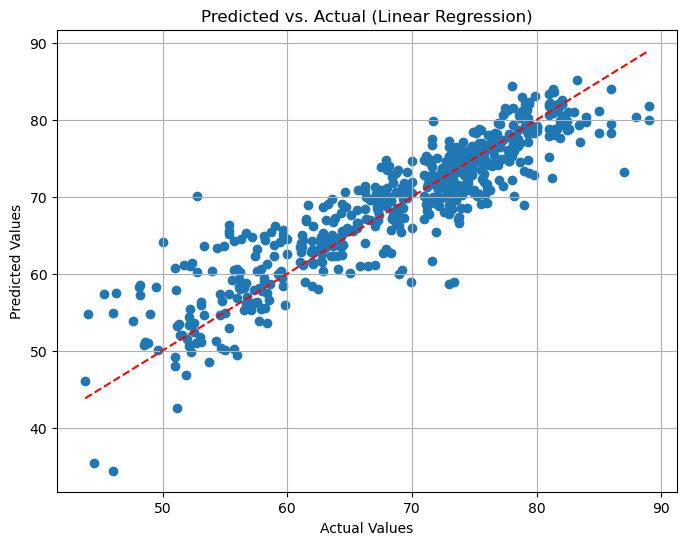

Linear Regression Results:
R-squared: 0.8226947795445846
Mean Squared Error: 15.360886871284777
Mean Absolute Error: 2.8612471374316026
Root Mean Squared Error (RMSE): 3.919296731721748




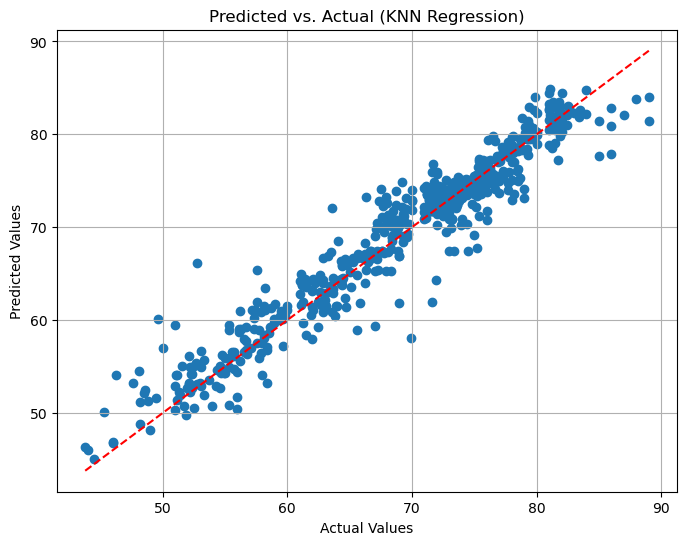

KNN Regression Results:
R-squared: 0.9236713647735508
Mean Squared Error: 6.612752448808324
Mean Absolute Error: 1.8022790974313216
Root Mean Squared Error (RMSE): 2.5715272599776817




C:\Users\hp\AppData\Local\Temp\ipykernel_12684\3147955229.py:75: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


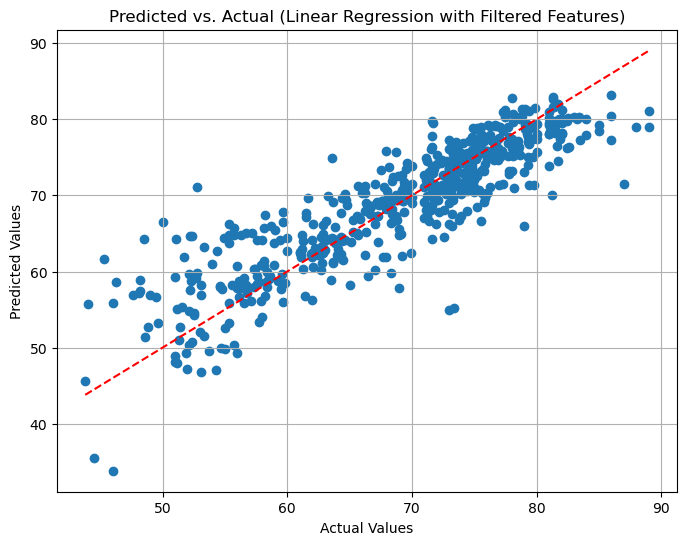

Linear Regression with Filtered Features Results:
R-squared: 0.7732376538827654
Mean Squared Error: 19.64561864804119
Mean Absolute Error: 3.2104150388557366
Root Mean Squared Error (RMSE): 4.432337830991811




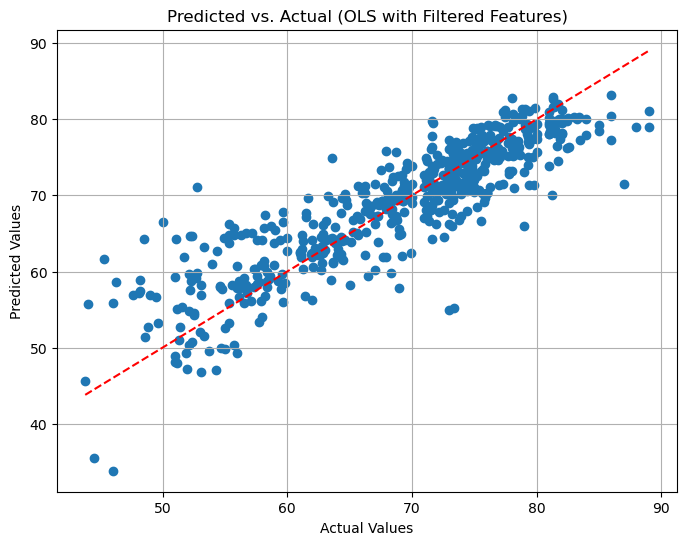


######################### OLS with Filtered Features ###################
                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     1620.
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:49:59   Log-Likelihood:                -6882.9
No. Observations:                2350   AIC:                         1.378e+04
Df Residuals:                    2344   BIC:                         1.381e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming 'life_expectancy' is your target column
X = df.drop(columns=['Life expectancy'])

# Exclude non-numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_columns]

y = df['Life expectancy']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Plotting Predicted vs. Actual for LR model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (Linear Regression)")
plt.grid(True)
plt.show()

# Print Linear Regression results
print("Linear Regression Results:")
print("R-squared:", r2_score(y_test, lr_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, lr_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, lr_predictions))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, lr_predictions)))
print("\n")

# KNN Regression model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Plotting Predicted vs. Actual for KNN model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (KNN Regression)")
plt.grid(True)
plt.show()

# Print KNN Regression results
print("KNN Regression Results:")
print("R-squared:", r2_score(y_test, knn_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, knn_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, knn_predictions))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, knn_predictions)))
print("\n")

# Filter Method (e.g., Correlation Coefficient)
corr_matrix = df.corr()
corr_with_target = corr_matrix['Life expectancy'].abs().sort_values(ascending=False)
top_features = corr_with_target[1:6].index  # Selecting top 5 features
X_filtered = X[top_features]

# Standardizing the filtered features
X_filtered_scaled = scaler.fit_transform(X_filtered)

# Splitting the filtered data into training and testing sets
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered_scaled, y, test_size=0.2, random_state=42)

# Linear Regression model with filtered features
lr_model_filtered = LinearRegression()
lr_model_filtered.fit(X_train_filtered, y_train_filtered)
lr_predictions_filtered = lr_model_filtered.predict(X_test_filtered)

# Plotting Predicted vs. Actual for LR model with filtered features
plt.figure(figsize=(8, 6))
plt.scatter(y_test_filtered, lr_predictions_filtered)
plt.plot([min(y_test_filtered), max(y_test_filtered)], [min(y_test_filtered), max(y_test_filtered)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (Linear Regression with Filtered Features)")
plt.grid(True)
plt.show()

# Print Linear Regression with filtered features results
print("Linear Regression with Filtered Features Results:")
print("R-squared:", r2_score(y_test_filtered, lr_predictions_filtered))
print("Mean Squared Error:", mean_squared_error(y_test_filtered, lr_predictions_filtered))
print("Mean Absolute Error:", mean_absolute_error(y_test_filtered, lr_predictions_filtered))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test_filtered, lr_predictions_filtered)))
print("\n")

# OLS (Ordinary Least Squares) Regression with filtered features
X_train_filtered_ols = sm.add_constant(X_train_filtered)
X_test_filtered_ols = sm.add_constant(X_test_filtered)
ols_model_filtered = sm.OLS(y_train_filtered, X_train_filtered_ols).fit()
y_pred_filtered_ols = ols_model_filtered.predict(X_test_filtered_ols)

# Plotting Predicted vs. Actual for OLS model with filtered features
plt.figure(figsize=(8, 6))
plt.scatter(y_test_filtered, y_pred_filtered_ols)
plt.plot([min(y_test_filtered), max(y_test_filtered)], [min(y_test_filtered), max(y_test_filtered)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (OLS with Filtered Features)")
plt.grid(True)
plt.show()

# Printing OLS summary for filtered features
print("\n######################### OLS with Filtered Features ###################")
print(ols_model_filtered.summary())

# Evaluate OLS Regression with filtered features
r2_ols_filtered = r2_score(y_test_filtered, y_pred_filtered_ols)
mae_filtered = mean_absolute_error(y_test_filtered, y_pred_filtered_ols)
mse_filtered = mean_squared_error(y_test_filtered, y_pred_filtered_ols)
rmse_filtered = np.sqrt(mse_filtered)

print("\nOLS Results with Filtered Features:")
print("R-squared (R2) Score:", r2_ols_filtered)
print("Mean Absolute Error (MAE):", mae_filtered)
print("Mean Squared Error (MSE):", mse_filtered)
print("Root Mean Squared Error (RMSE):", rmse_filtered)


## Linear Regression Results:

#### R-squared: 
The coefficient of determination is approximately 0.82, indicating that around 82.27% of the variance in life expectancy is explained by the linear regression model. This suggests a reasonably good fit of the model to the data.

#### MSE: 
The average squared difference between the actual and predicted values is approximately 15.36 square years. Lower values indicate better predictive performance.

#### MAE: 
The average absolute difference between the actual and predicted life expectancy values is about 2.86 years. It represents the average magnitude of errors in the predictions.

#### RMSE: 
The square root of MSE is approximately 3.92 years, providing an interpretable value in the same units as the target variable.

## KNN Regression Results:

#### R-squared: 
The coefficient of determination is approximately 0.92, indicating a high proportion of variance in life expectancy is captured by the KNN regression model. This suggests that the model fits the data very well.

#### MSE: 
The average squared difference between the actual and predicted values is approximately 6.61 square years, which is considerably lower compared to linear regression. This indicates that the KNN model has lower prediction errors.

#### MAE: 
The average absolute difference between the actual and predicted life expectancy values is about 1.80 years, which is lower than linear regression. It suggests that the KNN model has better accuracy in predicting life expectancy.
#### RMSE: 
The square root of MSE is approximately 2.57 years, indicating a smaller average error compared to linear regression.

## Linear Regression with Filtered Features Results:

#### R-squared: 
The coefficient of determination is approximately 0.77, indicating a moderate level of variance explained by the linear regression model with filtered features. This suggests that the filtered features may not capture as much information as the original set of features.
#### MSE: 
The average squared difference between the actual and predicted values is approximately 19.65 square years, which is higher compared to both linear regression and KNN regression without feature filtering. This indicates that the model with filtered features has higher prediction errors.
#### MAE: 
The average absolute difference between the actual and predicted life expectancy values is about 3.21 years, which is higher compared to both linear regression and KNN regression without feature filtering. It suggests that the accuracy of predictions is lower when using filtered features.
#### RMSE: 
The square root of MSE is approximately 4.43 years, indicating a larger average error compared to both linear regression and KNN regression without feature filtering.

## OLS Results with Filtered Features:

#### R-squared: 
The coefficient of determination is approximately 0.77, which matches the R-squared value obtained from linear regression with filtered features. OLS regression with filtered features essentially produces the same results as linear regression.

#### MAE: 
The average absolute difference between the actual and predicted life expectancy values is about 3.21 years, consistent with linear regression with filtered features.

#### MSE: 
The average squared difference between the actual and predicted values is approximately 19.65 square years, consistent with linear regression with filtered features.
#### RMSE: 
The square root of MSE is approximately 4.43 years, consistent with linear regression with filtered features.

## Overall, 
these results suggest that the KNN regression model performs the best among the models considered, as it has the highest R-squared value and lowest error metrics (MSE, MAE, RMSE). Linear regression and OLS regression with filtered features perform similarly, while linear regression with filtered features shows slightly lower performance. This indicates that the KNN regression model may be the most suitable for predicting life expectancy based on the given features, followed by linear regression without feature filtering.

# With PCA(Princopal Component Analysis)

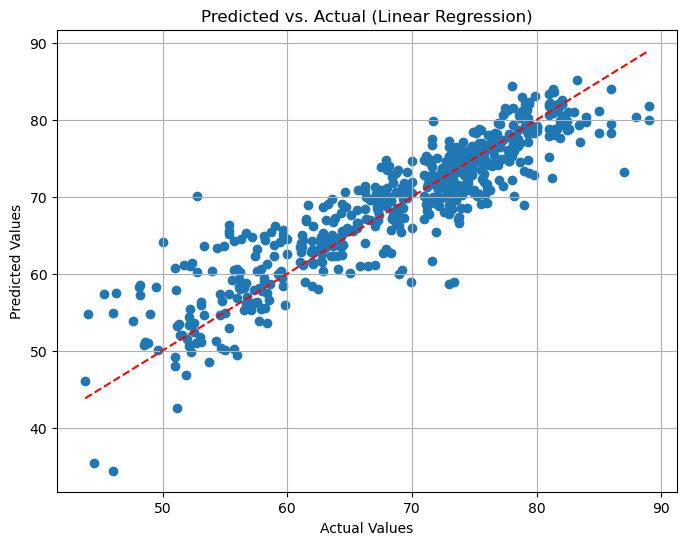

Linear Regression Results:
R-squared: 0.8226947795445846
Mean Squared Error: 15.360886871284777
Mean Absolute Error: 2.8612471374316026
Root Mean Squared Error (RMSE): 3.919296731721748




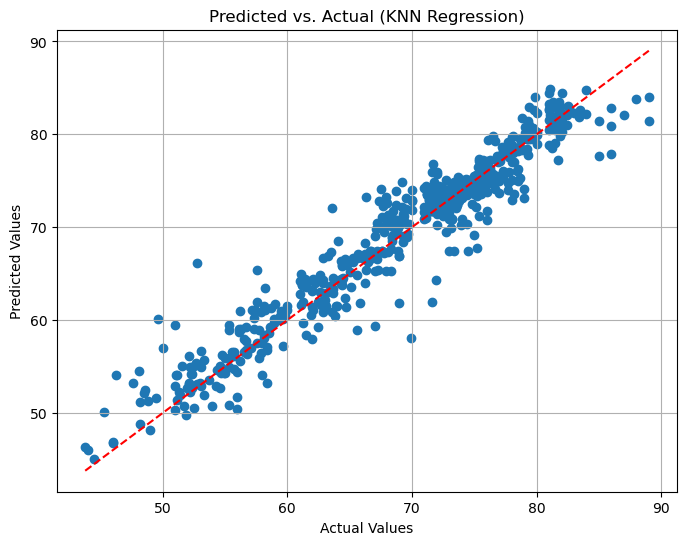

KNN Regression Results:
R-squared: 0.9236713647735508
Mean Squared Error: 6.612752448808324
Mean Absolute Error: 1.8022790974313216
Root Mean Squared Error (RMSE): 2.5715272599776817




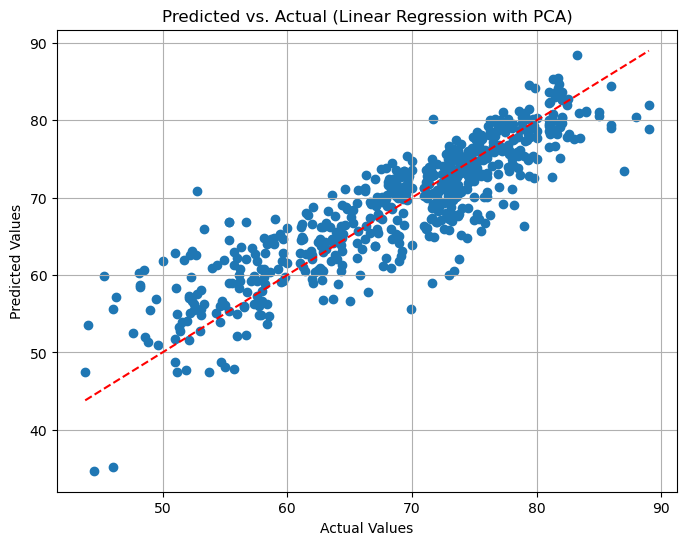

Linear Regression with PCA Results:
R-squared: 0.7775168635676364
Mean Squared Error: 19.274888132047504
Mean Absolute Error: 3.328831998789728
Root Mean Squared Error (RMSE): 4.390317543418415




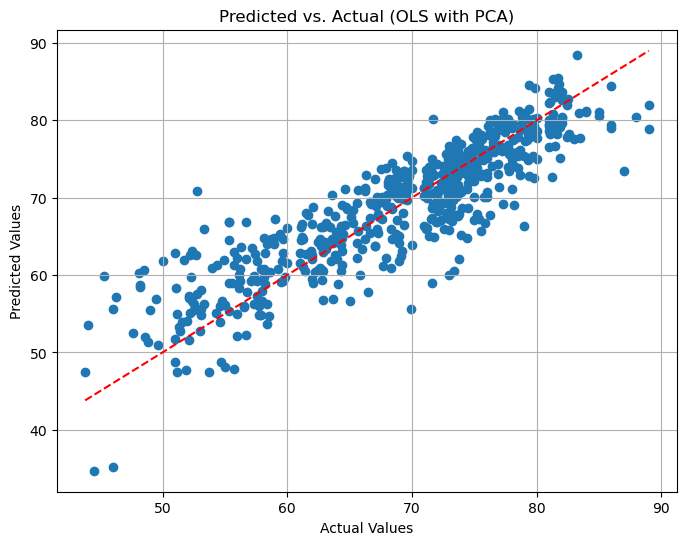


######################### OLS with PCA ###################
                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     1602.
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:50:03   Log-Likelihood:                -6893.2
No. Observations:                2350   AIC:                         1.380e+04
Df Residuals:                    2344   BIC:                         1.383e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming 'life_expectancy' is your target column
X = df.drop(columns=['Life expectancy'])

# Exclude non-numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_columns]

y = df['Life expectancy']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Plotting Predicted vs. Actual for LR model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (Linear Regression)")
plt.grid(True)
plt.show()

# Print Linear Regression results
print("Linear Regression Results:")
print("R-squared:", r2_score(y_test, lr_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, lr_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, lr_predictions))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, lr_predictions)))
print("\n")

# KNN Regression model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Plotting Predicted vs. Actual for KNN model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, knn_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (KNN Regression)")
plt.grid(True)
plt.show()

# Print KNN Regression results
print("KNN Regression Results:")
print("R-squared:", r2_score(y_test, knn_predictions))
print("Mean Squared Error:", mean_squared_error(y_test, knn_predictions))
print("Mean Absolute Error:", mean_absolute_error(y_test, knn_predictions))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, knn_predictions)))
print("\n")

# PCA (Principal Component Analysis)
pca = PCA(n_components=5)  # Selecting 5 principal components
X_pca = pca.fit_transform(X_scaled)

# Splitting the PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Linear Regression model with PCA
lr_model_pca = LinearRegression()
lr_model_pca.fit(X_train_pca, y_train_pca)
lr_predictions_pca = lr_model_pca.predict(X_test_pca)

# Plotting Predicted vs. Actual for LR model with PCA
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pca, lr_predictions_pca)
plt.plot([min(y_test_pca), max(y_test_pca)], [min(y_test_pca), max(y_test_pca)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (Linear Regression with PCA)")
plt.grid(True)
plt.show()

# Print Linear Regression with PCA results
print("Linear Regression with PCA Results:")
print("R-squared:", r2_score(y_test_pca, lr_predictions_pca))
print("Mean Squared Error:", mean_squared_error(y_test_pca, lr_predictions_pca))
print("Mean Absolute Error:", mean_absolute_error(y_test_pca, lr_predictions_pca))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test_pca, lr_predictions_pca)))
print("\n")

# OLS (Ordinary Least Squares) Regression with PCA
X_train_pca_ols = sm.add_constant(X_train_pca)
X_test_pca_ols = sm.add_constant(X_test_pca)
ols_model_pca = sm.OLS(y_train_pca, X_train_pca_ols).fit()
y_pred_pca_ols = ols_model_pca.predict(X_test_pca_ols)

# Plotting Predicted vs. Actual for OLS model with PCA
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pca, y_pred_pca_ols)
plt.plot([min(y_test_pca), max(y_test_pca)], [min(y_test_pca), max(y_test_pca)], color='red', linestyle='--')  # Adding a learning line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual (OLS with PCA)")
plt.grid(True)
plt.show()

# Printing OLS summary for PCA
print("\n######################### OLS with PCA ###################")
print(ols_model_pca.summary())

# Evaluate OLS Regression with PCA
r2_ols_pca = r2_score(y_test_pca, y_pred_pca_ols)
mae_pca = mean_absolute_error(y_test_pca, y_pred_pca_ols)
mse_pca = mean_squared_error(y_test_pca, y_pred_pca_ols)
rmse_pca = np.sqrt(mse_pca)

print("\nOLS Results with PCA:")
print("R-squared (R2) Score:", r2_ols_pca)
print("Mean Absolute Error (MAE):", mae_pca)
print("Mean Squared Error (MSE):", mse_pca)
print("Root Mean Squared Error (RMSE):", rmse_pca)


## Linear Regression Results:

#### R-squared: 
The coefficient of determination is approximately 0.82, indicating that around 82.27% of the variance in life expectancy is explained by the linear regression model. This suggests a reasonably good fit of the model to the data.

#### MSE: 
The average squared difference between the actual and predicted values is approximately 15.36 square years. Lower values indicate better predictive performance.
#### MAE: 
The average absolute difference between the actual and predicted life expectancy values is about 2.86 years. It represents the average magnitude of errors in the predictions.
#### RMSE: 
The square root of MSE is approximately 3.92 years, providing an interpretable value in the same units as the target variable.

## KNN Regression Results:

#### R-squared: 
The coefficient of determination is approximately 0.92, indicating a high proportion of variance in life expectancy is captured by the KNN regression model. This suggests that the model fits the data very well.

#### MSE: 
The average squared difference between the actual and predicted values is approximately 6.61 square years, which is considerably lower compared to linear regression. This indicates that the KNN model has lower prediction errors.

#### MAE: 
The average absolute difference between the actual and predicted life expectancy values is about 1.80 years, which is lower than linear regression. It suggests that the KNN model has better accuracy in predicting life expectancy.

#### RMSE: 
The square root of MSE is approximately 2.57 years, indicating a smaller average error compared to linear regression.

## Linear Regression with PCA Results:

#### R-squared: 
The coefficient of determination is approximately 0.78, which is slightly lower than the linear regression without PCA. This suggests that using PCA for dimensionality reduction has a minor impact on the model's predictive performance.

#### MSE: 
The average squared difference between the actual and predicted values is approximately 19.27 square years, higher than linear regression without PCA. This indicates that the model with PCA has higher prediction errors.

#### MAE: 
The average absolute difference between the actual and predicted life expectancy values is about 3.33 years, higher than linear regression without PCA. It suggests that the accuracy of predictions is lower when using PCA.

#### RMSE: 
The square root of MSE is approximately 4.39 years, indicating a larger average error compared to linear regression without PCA.

## OLS Regression with PCA Results:

#### R-squared: 
The coefficient of determination is approximately 0.78, consistent with linear regression with PCA. OLS regression with PCA essentially produces the same results as linear regression.

#### MAE: 
The average absolute difference between the actual and predicted life expectancy values is about 3.33 years, consistent with linear regression with PCA.
#### MSE: 
The average squared difference between the actual and predicted values is approximately 19.27 square years, consistent with 
linear regression with PCA.

#### RMSE: 
The square root of MSE is approximately 4.39 years, consistent with linear regression with PCA.

In summary, while linear regression and KNN regression show better performance compared to linear regression with PCA, both linear regression and OLS regression with PCA have similar predictive performance, albeit slightly lower than linear regression without PCA. This indicates that the use of PCA for dimensionality reduction may not significantly improve the predictive capability of the model in this context.

# Overall Summary

* KNN Regression has the highest R-squared value (0.9237), indicating that it explains the most variance in the data among the models.
* KNN Regression also has the lowest Mean Squared Error (6.613) and Mean Absolute Error (1.802), indicating better predictive performance and lower error rates.
* Linear Regression performs reasonably well but falls short compared to KNN Regression in terms of R-squared, MSE, and MAE.
* Linear Regression with PCA and OLS Regression with PCA perform the worst among the four models, with lower R-squared and higher error metrics compared to the other models.

### Conclusion:
Based on the comparison, KNN Regression appears to be the best model among the four options for predicting life expectancy. It demonstrates the highest R-squared value and the lowest errors, indicating better predictive accuracy and performance. Therefore, KNN Regression would be the recommended choice for this task.